In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
train = pd.read_csv("./data/train.csv")
train.head()

,1,2,3,4,5,6,7,8,9,10,...,82,83,84,85,86,87,88,89,90,91
0,2010,39.84206,-20.75648,29.48659,9.13133,-34.73171,25.30868,-17.53146,-0.81226,33.36728,...,18.24294,-316.93816,187.92008,-144.39232,-29.06036,-132.86518,-438.22172,4.66880,248.91304,14.72145
1,2007,26.78723,-105.18596,-59.50360,-40.68740,4.88542,-14.57119,-14.62723,4.06196,-9.23503,...,97.00557,-206.79315,74.66190,36.85846,-14.37803,39.42002,-130.87034,-7.79827,136.91786,14.91733
2,1990,35.76436,47.86833,-49.95625,13.12056,13.14977,-0.91832,5.17086,14.29169,-0.23332,...,3.93938,307.08199,152.79062,82.84446,31.40295,-120.35730,8.62826,14.86158,-163.12241,10.52487
3,1980,47.49072,7.45276,10.03510,-8.93311,0.68797,-23.85926,5.41692,2.11112,1.45140,...,2.04457,-7.63245,17.70301,19.77177,-0.77648,-4.29839,25.65015,-0.95074,-2.83116,0.28159
4,2007,38.81100,-76.17152,25.32546,-11.67108,22.17337,-6.83532,-16.03574,1.82844,-7.42264,...,51.59542,-214.10170,51.64134,65.37269,9.98219,-50.94941,-5.19080,-15.02900,-54.98544,-3.34468


In [3]:
unique_labels = train["1"].unique()
print("unique labels are ", unique_labels)

columns = list(train.columns)
print(columns[1:])

unique labels are  [2010 2007 1990 1980 1987 2008 1997 2006 2005 2003 1968 1993 1974 1995
 1998 1983 1994 1988 2002 2004 2000 1984 1969 2001 1981 2009 1992 1986
 1999 1996 1991 1928 1961 1979 1965 1989 1973 1971 1982 1985 1959 1935
 1967 1976 1977 1966 1964 1970 1972 1956 1975 1946 1958 1978 1963 1957
 1962 1931 1950 1939 1955 1960 1947 1941 1952 1929 1940 1948 1930 1954
 1953 1942 1927 1944 1937 1926 1949 1945 1951 1934 1925 1922 1938]
['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91']


In [4]:
def standard_scaler(data, params):
    columns = data.columns
    
    for column in columns:
        if column not in params:
            mean = data[column].mean()
            std = data[column].std()
            params[column] = {}
            params[column]["mean"] = mean
            params[column]["std"] = std
        
        data[column] -= params[column]["mean"]
        data[column] /= params[column]["std"]
    
    return data

In [7]:
train_feat = train.drop('1', axis=1)

params = {}
train_feat = standard_scaler(train_feat, params).to_numpy()

print(train_feat.shape, train_y.shape)
train_y = train["1"].to_numpy()


(40800, 90) (40800,)


Feature 1: 2140.506404
Feature 2: 30.268049
Feature 3: 971.463419
Feature 4: 0.458253
Feature 5: 17.605401
Feature 6: 1487.424689
Feature 7: 596.084550
Feature 8: 36.962872
Feature 9: 42.734136
Feature 10: 43.896099
Feature 11: 16.082161
Feature 12: 456.595836
Feature 13: 39.956558
Feature 14: 274.226701
Feature 15: 4.184652
Feature 16: 80.676886
Feature 17: 39.615806
Feature 18: 40.539038
Feature 19: 0.867300
Feature 20: 373.018908
Feature 21: 159.461329
Feature 22: 144.408596
Feature 23: 126.999291
Feature 24: 165.517363
Feature 25: 159.283477
Feature 26: 15.539326
Feature 27: 60.032521
Feature 28: 1.165414
Feature 29: 240.310475
Feature 30: 28.746867
Feature 31: 273.733912
Feature 32: 38.804325
Feature 33: 451.707987
Feature 34: 110.528901
Feature 35: 150.563344
Feature 36: 383.180868
Feature 37: 81.117775
Feature 38: 185.925559
Feature 39: 143.620737
Feature 40: 669.048381
Feature 41: 166.188231
Feature 42: 4.817934
Feature 43: 1.031220
Feature 44: 13.578725
Feature 45: 26.725003
F

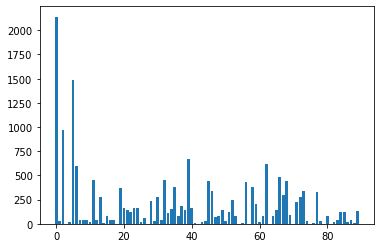

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=10)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs
 
# feature selection
X_train_fs, fs = select_features(train_feat, train_y)
# what are scores for the features
scores = []
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i+1, fs.scores_[i]))
    scores.append((i+1,fs.scores_[i]))
scores.sort(reverse=True, key=lambda x: x[1])
print(scores)
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [56]:
corr = train_feat.corr()
print(type(corr))

corr.to_csv("corr.csv")

<class 'pandas.core.frame.DataFrame'>


In [57]:
correlation = []

for index, row in corr.iterrows():
    for column in columns[1:]:
        if (row[column] > 0.6 or row[column] < -0.6) and column != index: correlation.append((index + "-" + column, row[column]))

correlation.sort(reverse=True, key=lambda x: x[1])
print(correlation)
dict_ = {}

for item in correlation:
    pair = item[0]
    first = pair.split("-")[0]
    second = pair.split("-")[1]
    if first in dict_: dict_[first].append(second)
    else:
        dict_[first] = [second]

print()
print(dict_)

[('21-23', 0.8678147733278119), ('23-21', 0.8678147733278119), ('19-24', 0.8647511089145147), ('24-19', 0.8647511089145147), ('17-24', 0.848186532871573), ('24-17', 0.848186532871573), ('17-19', 0.8120493054560278), ('19-17', 0.8120493054560278), ('17-21', 0.7237248111642905), ('21-17', 0.7237248111642905), ('23-24', 0.7229117831731019), ('24-23', 0.7229117831731019), ('19-23', 0.7193024283169451), ('23-19', 0.7193024283169451), ('21-24', 0.7178240565626129), ('24-21', 0.7178240565626129), ('17-23', 0.6966652518758928), ('23-17', 0.6966652518758928), ('19-21', 0.6950877275594064), ('21-19', 0.6950877275594064), ('59-61', 0.672600008742663), ('61-59', 0.672600008742663), ('22-25', 0.6478122646496844), ('25-22', 0.6478122646496844), ('7-19', 0.6385528180304665), ('19-7', 0.6385528180304665), ('20-25', 0.6357099455401176), ('25-20', 0.6357099455401176), ('7-24', 0.6176658403899646), ('24-7', 0.6176658403899646), ('20-22', 0.6170359823415817), ('22-20', 0.6170359823415817)]

{'21': ['23', 

In [59]:
# finding correlation after removing correlated features
corr_features = ["59", "25", "22", "19", "24", "21", "17"]
train_feat = train_feat.drop(corr_features, axis=1)
len(train_feat.columns)

KeyError: "['59', '25', '22', '19', '24', '21', '17'] not found in axis"

In [31]:
# finding correlation between label and features
corr = train.corr()
corr.to_csv("label_featurecorr.csv")

corr_feats = []
for index,row in corr.iterrows():
    for column in columns[1:]:
        if row[column] > 0.5: corr_feats.append((column,row[column]))
    break

corr_feats

[]

In [ ]:
train_feat

In [96]:
# Feature selection usign LASSO regression
from sklearn.linear_model import Lasso
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

X = train_feat.to_numpy()
y = train["1"].to_numpy()
columns = train_feat.columns
print(X.shape)

lsvc = Lasso(alpha=0.0001, max_iter=5000).fit(X, y)
useless = []
for i, coff in enumerate(lsvc.coef_):
    if coff == 0:
        #print(X[0])
        useless.append(columns[i])
print(len(useless), useless)

(40800, 83)
3 ['55', '56', '82']


In [ ]:
# plot histogram of labels
# minmax scale the data for every feature
# find correlation between features
# find methods to improve features and reduce features for numeric data
# check meaning of timbre avg and timbre covariance since features are just those
# check range of feature values for different classes
# 

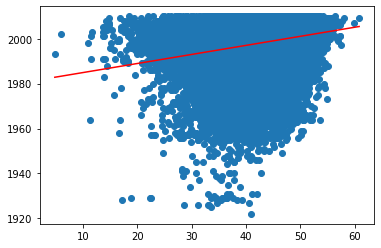

In [5]:
# correlation between input features and output
x = train["2"]
y = train["1"]

plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')


# correlation between input features

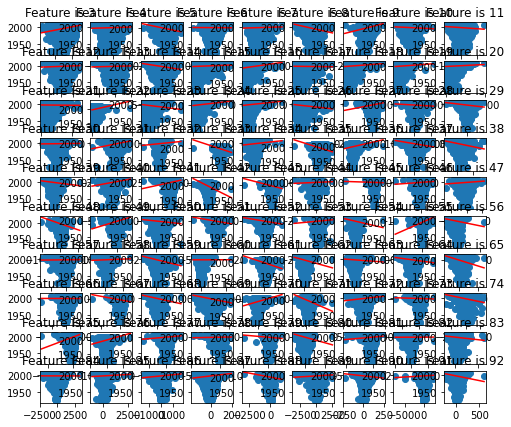

In [19]:
figure, axis = plt.subplots(10, 9)

feature = 2
y = train["1"]


figure.set_figwidth(8)
figure.set_figheight(7)

for row in range(0,10):
    for col in range(0,9):
        x = train[str(feature)]
        feature += 1
        axis[row, col].scatter(x, y)
        axis[row,col].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
        axis[row, col].set_title("Feature is {}".format(feature))
        

plt.show()
